# Introduction

Le stress académique est devenu une problématique majeure dans le milieu universitaire, affectant une proportion significative d'étudiants à l'échelle mondiale. En France, une étude menée par Heyme et Opinion Way en 2020 révèle que 90% des étudiants se déclarent stressés, dont un tiers ressentant un stress permanent. Cette tendance est confirmée par l'étude CSA pour la LMDE en 2022, indiquant que 70% des étudiants se déclarent en situation de mal-être.

## Causes du stress académique

Les sources de stress chez les étudiants sont multiples et souvent
interconnectées. Parmi les facteurs les plus freéquemment cités, on retrouve :
- Pression académique : exigences élevées en termes de performance, les examens
fréquents et la charge de travail intense contribuent à un stress constant.
- Pression sociale : Les attentes des pairs, la compétition entre étudiants et le
besoin de se conformer à des normes sociales peuvent exacerber le stress.
- Pression familiale : Les attentes des parents concernant la réussite académique
et professionnelle peuvent ajouter une pression supplémentaire.
- Isolement social : Près d'un étudiant sur deux indique se sentir toujours ou
souvent seul, ce qui peut être vecteur d'anxiété ou de troubles psychiques.

## Conséquences sur la santé

Les répercussions du stress académique sur la santé des étudiants sont
préoccupantes. Il est associé à :
- Troubles mentaux : Anxiété, dépression, troubles du sommeil et épuisement
émotionnel sont couramment observés chez les étudiants stressés.
- Répercussions physiques : Le stress chronique peut entraîner des problèmes de
santé physique, tels que des troubles digestifs, des maux de tête et une baisse
du système immunitaire.
- Impact sur la réussite académique : Les étudiants en détresse psychologique
présentent un risque accru de baisse de performance académique et d'abandon des
études. Le serpent qui se mord la queue...

## Besoin d'interventions ciblées

Face à cette situation, il est essentiel de développer des stratégies de gestion
du stress adaptées aux besoins spécifiques des étudiants. Cela inclut la mise en
place de programmes de soutien psychologique, la promotion de la santé mentale et
la création d'environnements d'apprentissage favorables au bien-être en favorisant l'inclusion plutôt que l'exclusion.

Ainsi, face à l'ampleur et aux multiples facettes du stress académique, j'ai
voulu explorer ces mécanismes à travers un jeu de données concret, dans l'objectif de mieux comprendre et partager les facteurs qui contribuent au stress
chez les étudiants. Les données utilisées dans cette étude proviennent d'un
dataset disponible sur Kaggle, collecté via un questionnaire en ligne le 24
juillet 2025.

# Présentation des données

Le questionnaire portait sur plusieurs dimensions : stade académique, pression
exercée par les pairs et la famille, environnement d'étude, stratégies de coping
adoptées, habitudes de vie (comme tabac ou alcool) et l'indice de stress
académique sur lequel nous allons faire des prédictions. Chaque réponse a été
soigneusement enregistrée et compilée par le chercheur afin de permettre une
analyse exploratoire des facteurs associés au stress académique, dans le but de
produire des résultats interprétables et partageables.

Cette approche permet de mettre en lumière certaines tendances et corrélations
même si, compte tenu de la taille limitée de l'échantillon (140 observations),
les conclusions ne sont pas généralisables. Elle sert surtout à illustrer le
phénomène et à sensibiliser à l'impact du stress académique sur la santé mentale
et physique des étudiants.

### Librairies

Avant de présenter les données de notre échantillon, il est bon de montrer les différentes libraries que nous allons utiliser pour les différentes analyses qui se présenteront par la suite.

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Le jeu de données contient 140 réponses d'étudiants et a été structuré pour analyser les différents facteurs pouvant influencer le stress académique. Chaque variable a été soigneusement définie pour capturer un aspect précis de l'expérience étudiante :
- Timestamp : date et heure de la réponse au questionnaire.
- Your Academic Stage : niveau d'études actuel de l'étudiant.
- Peer Pressure :  pression ressentie de la part des pairs (collègues étudiants).
- Academic Pressure from your Home : pression académique perçue venant de la famille.
- Study Environment : conditions dans lesquelles l'étudiant étudie.
- What coping strategy you use as a student : stratégies de coping ou méthodes pour gérer le stress.
- Do you have any bad habits like smoking or drinking on a daily basis : habitudes de vie pouvant influencer le stress.
- What would you rate the academic competition in your student life : perception de la compétition académique.
- Rate your academic stress index : score auto-évalué du niveau de stress academique.

In [4]:
df = pd.read_csv("C:/Users/maxou/Documents/Projets/Perso/Academic_stress/academic_stress_level.csv", sep=",")
df.head(3)

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,Do you have any bad habits like smoking or drinking on a daily basis?,What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,Social support (friends or family),No,2,4


## Traitement des données

Avant toute analyse, il est important de vérifier la qualité des données :
- valeurs manquantes
- doublons
- outliers
- distribution

Ces vérifications permettront d'assurer que les analyses descriptives et le modèle prédictif reposent sur des données fiables.

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d/%m/%Y %H:%M:%S")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                                 Non-Null Count  Dtype         
---  ------                                                                 --------------  -----         
 0   Timestamp                                                              140 non-null    datetime64[ns]
 1   Your Academic Stage                                                    140 non-null    object        
 2   Peer pressure                                                          140 non-null    int64         
 3   Academic pressure from your home                                       140 non-null    int64         
 4   Study Environment                                                      139 non-null    object        
 5   What coping strategy you use as a student?                             140 non-null    object        
 6   Do you have any bad habits like smo

Le jeu de données comme on peut le voir ci-dessus comporte 140 observations et 9 variables couvrant différents aspects du stress académique.

La variable Timestamp recodé enregistre la date et l'heure de réponse au questionnaire.

Quatre variables qualitatives de type texte que sont : le niveau académique de l'étudiant, l'environnement d'étude, la stratégie de coping utilisée et les habitudes de consommation (tabac/alcool). Ces variables passeront par la suite en numérique nécessaire pour les analyses statistiques et prédictives.

Les autres variables sont numériques, codées sous formes d'entiers de 1 à 5 à savoir : la pression des pairs, la pression familiale, la perception de la compétition académique et l'indice de stress académique (variable à prédire).

Dans l'ensemble, le dataset est relativement complet : seule la variable Study Environment présente une valeur manquante. Aucune autre variable ne comporte de données absentes, et la structure du tableau (9 colonnes et 140 lignes) est cohérente pour mener des analyses descriptives et prédictives.

In [6]:
for col in df.columns:
    print(col, df[col].unique())

Timestamp <DatetimeArray>
['2025-07-24 22:05:39', '2025-07-24 22:05:52', '2025-07-24 22:06:39',
 '2025-07-24 22:06:45', '2025-07-24 22:08:06', '2025-07-24 22:08:13',
 '2025-07-24 22:09:21', '2025-07-24 22:10:06', '2025-07-24 22:11:01',
 '2025-07-24 22:11:19',
 ...
 '2025-08-12 13:16:50', '2025-08-12 15:01:20', '2025-08-13 21:45:58',
 '2025-08-14 06:10:01', '2025-08-14 21:06:15', '2025-08-17 13:02:04',
 '2025-08-18 14:36:00', '2025-08-18 17:13:52', '2025-08-18 19:08:52',
 '2025-08-18 22:40:13']
Length: 140, dtype: datetime64[ns]
Your Academic Stage ['undergraduate' 'high school' 'post-graduate']
Peer pressure [4 3 1 5 2]
Academic pressure from your home [5 4 1 2 3]
Study Environment ['Noisy' 'Peaceful' 'disrupted' nan]
What coping strategy you use as a student? ['Analyze the situation and handle it with intellect'
 'Social support (friends or family)' 'Emotional breakdown (crying a lot)']
Do you have any bad habits like smoking or drinking on a daily basis? ['No' 'prefer not to say' 'Ye

In [7]:
df.describe()

,Timestamp,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,140,140.000000,140.000000,140.000000,140.000000
mean,2025-07-28 04:41:46.878571264,3.071429,3.178571,3.492857,3.721429
min,2025-07-24 22:05:39,1.000000,1.000000,1.000000,1.000000
25%,2025-07-24 22:25:24.500000,2.000000,2.000000,3.000000,3.000000
50%,2025-07-25 08:27:41.500000,3.000000,3.000000,4.000000,4.000000
75%,2025-07-26 09:49:26,4.000000,4.000000,4.000000,4.000000
max,2025-08-18 22:40:13,5.000000,5.000000,5.000000,5.000000
std,NaN,1.083844,1.276618,1.028349,1.032339


# Statistiques descriptives

## Analyses univariées

Your Academic Stage
undergraduate    71.428571
high school      20.714286
post-graduate     7.857143
Name: proportion, dtype: float64
Study Environment
Peaceful     49.640288
disrupted    27.338129
Noisy        23.021583
Name: proportion, dtype: float64
What coping strategy you use as a student?
Analyze the situation and handle it with intellect    62.142857
Emotional breakdown (crying a lot)                    22.857143
Social support (friends or family)                    15.000000
Name: proportion, dtype: float64
Do you have any bad habits like smoking or drinking on a daily basis?
No                   87.857143
Yes                   7.142857
prefer not to say     5.000000
Name: proportion, dtype: float64


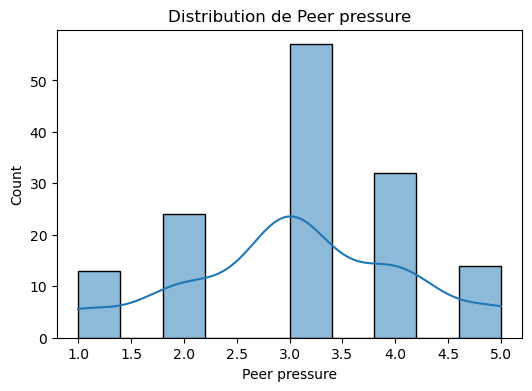

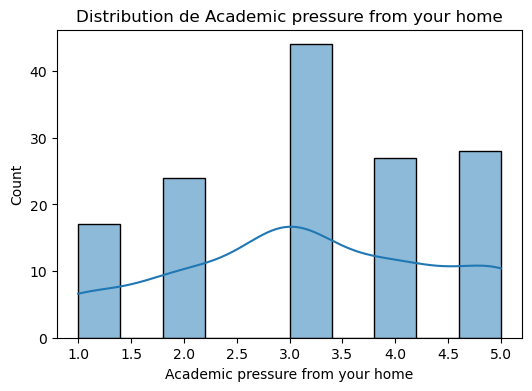

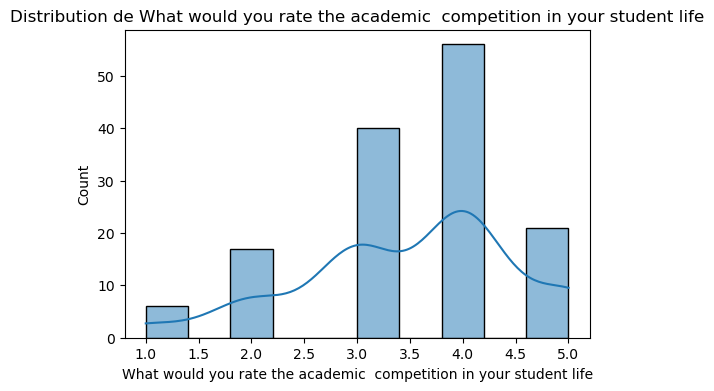

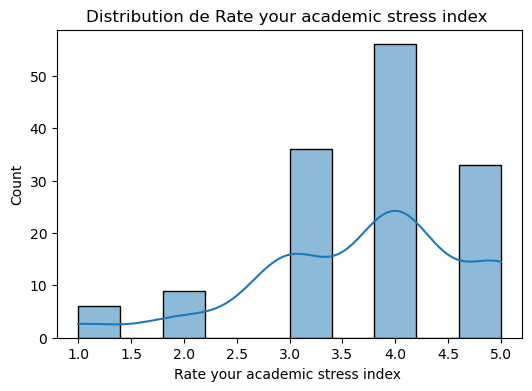

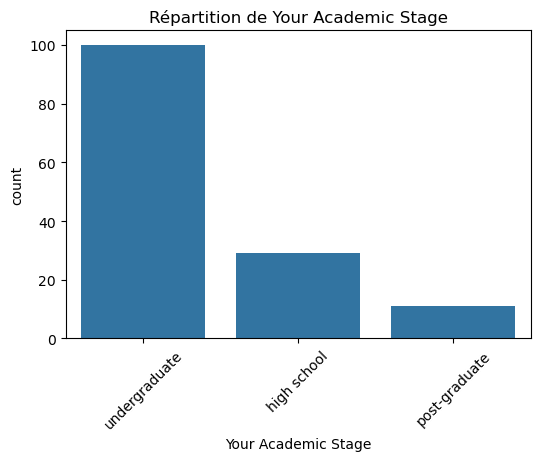

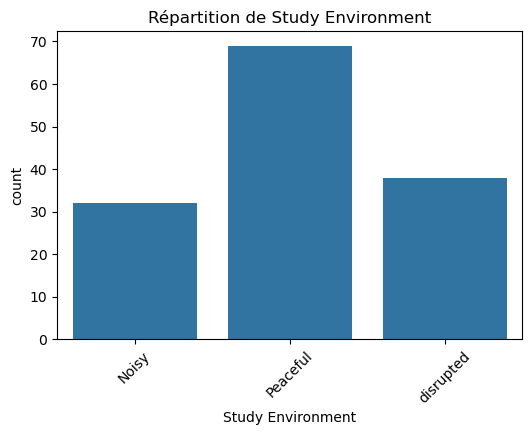

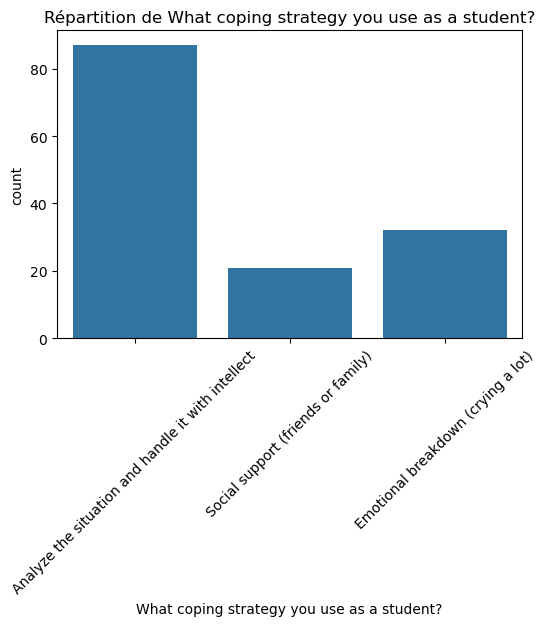

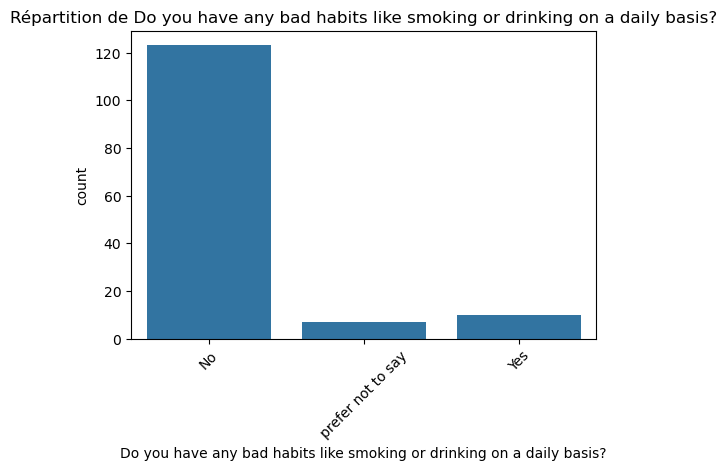

In [8]:
cat_vars = ["Your Academic Stage", "Study Environment", 
            "What coping strategy you use as a student?",
            "Do you have any bad habits like smoking or drinking on a daily basis?"]

for col in cat_vars:
    print(df[col].value_counts(normalize=True)*100)

num_vars = ["Peer pressure", 
            "Academic pressure from your home", 
            "What would you rate the academic  competition in your student life",
            "Rate your academic stress index "]

for col in num_vars:
    plt.figure(figsize = (6, 4))
    sns.histplot(df[col], kde = True, bins = 10)
    plt.title(f"Distribution de {col}")
    plt.show()

for col in cat_vars:
    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = col)
    plt.xticks(rotation = 45)
    plt.title(f"Répartition de {col}")
    plt.show()

On distingue :
- les variables catégorielles (Academic Stage, Study Environment, Coping Strategy, Bad Habits)
- les variables quantitatives (Peer pressure, Academic pressure from home, Academic competition, Academic stress index)

Ce qui saute directement aux yeux, ce sont pour les variables quantitatives, les étudiants ont tendance à se noter plus stressé que la moyenne pour n'importe quelle variable quantitative (à en voir par rapport à la moyenne qui est toujours supérieur (>3)).

Nos individus sont en général :
- des personnes qui n'ont pas de diplôme de l'enseignement supérieur
- des personnes étudiants dans un environnement calme
- des personnes qui analyse les situations qui s'offrent à eux et interragissent de manière intelligente.
- des personnes qui ne fument pas ni ne boivent d'alcool régulièrement

Finalement les variables tels que les personnes qui fument et boivent de l'alcool régulièrement ne sont pas important dans notre échantillon et vont donc biaiser nos réponses étant donné que les catégories au sein de cette variable ne sont pas hetérogènes. Nous pouvons faire le même constat pour les variables du niveau académique ou encore les stratégies de coping adoptées par les étudiants.

Au sein de notre échantillon de données, nous avons :
- Un sentiment de stress normal en moyenne de par la pression des pairs.
- La pression à la maison par la famille se situe également autour de la moyenne.
- Le stress acumulé par rapport à la compétition entre les étudiants en revanche montre une distribution avec une grande partie des répondants qui se sentent en compétition au sein de leur établissement.
- La note que s'attribue les étudiants au niveau de leur stress en général se situe au-dessus de la moyenne avec une bonne partie des répondants indiquant un sentiment de stress très élevé.

## Analyses bivariées

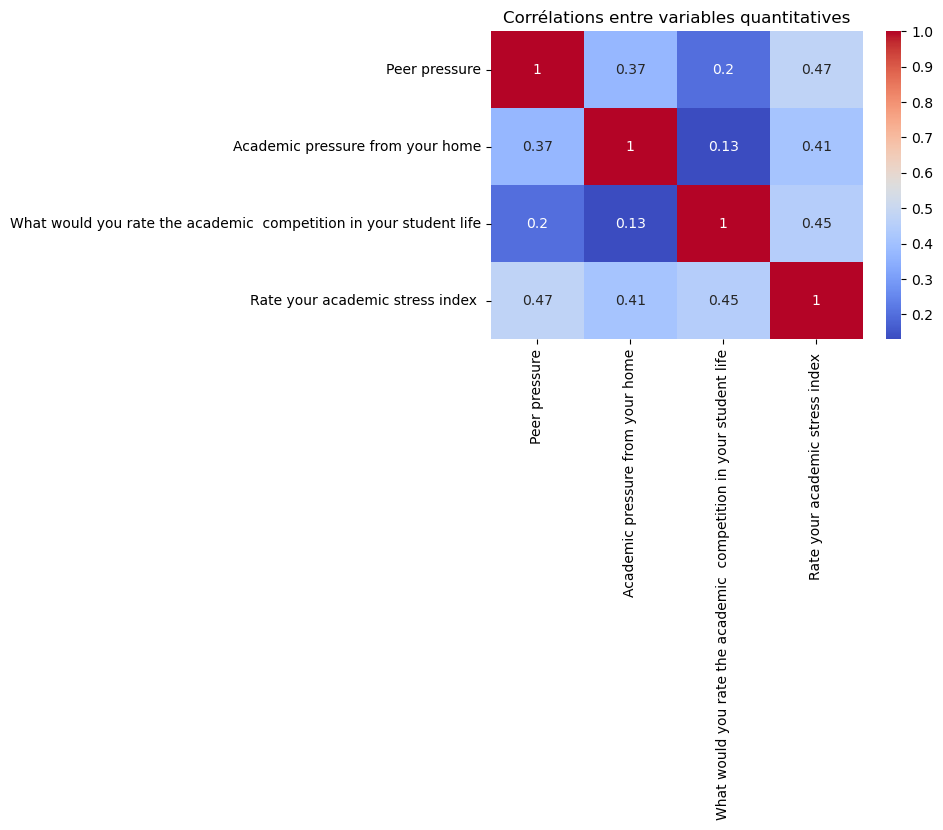

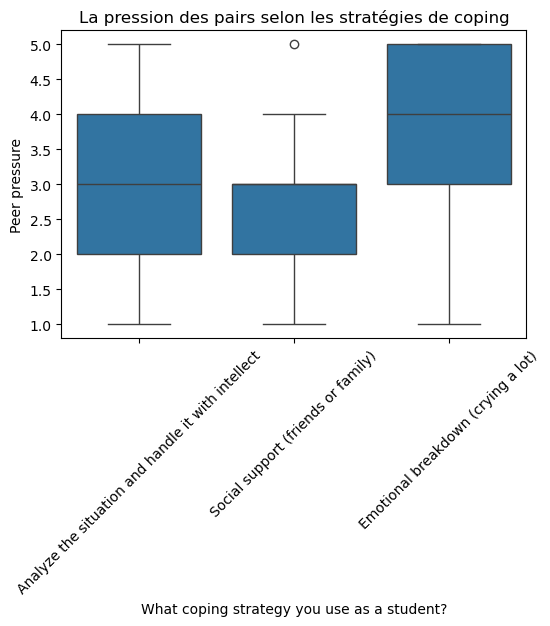

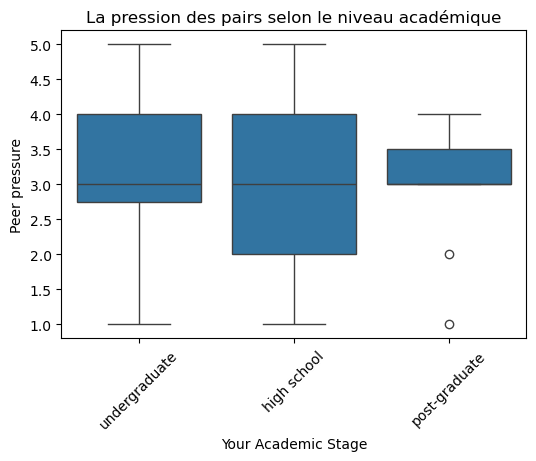

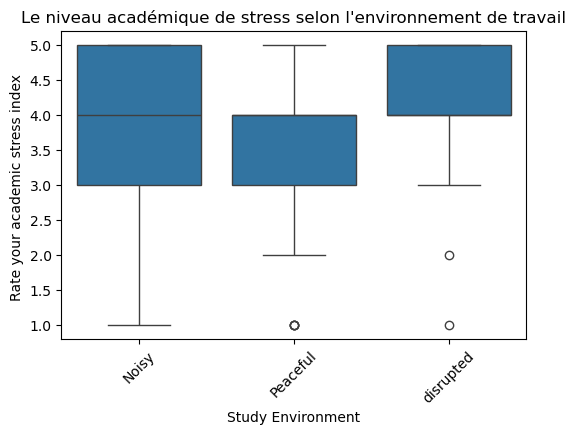

In [23]:
plt.figure(figsize = (6, 4))
sns.heatmap(df[num_vars].corr(), annot = True, cmap = "coolwarm")
plt.title("Corrélations entre variables quantitatives")
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x="What coping strategy you use as a student?", y="Peer pressure", data = df)
plt.title("La pression des pairs selon les stratégies de coping")
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x="Your Academic Stage", y="Peer pressure", data = df)
plt.title("La pression des pairs selon le niveau académique")
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x="Study Environment", y="Rate your academic stress index ", data = df)
plt.title("Le niveau académique de stress selon l'environnement de travail")
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x="

## Analyses multivariées

In [67]:
missing_vals = df.isnull().sum()
print('Missing values per column:')
print(missing_vals)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

Missing values per column:
Timestamp                                                                0
Your Academic Stage                                                      0
Peer pressure                                                            0
Academic pressure from your home                                         0
Study Environment                                                        1
What coping strategy you use as a student?                               0
Do you have any bad habits like smoking or drinking on a daily basis?    0
What would you rate the academic  competition in your student life       0
Rate your academic stress index                                          0
dtype: int64


C:\Users\maxou\AppData\Local\Temp\ipykernel_16424\1684295664.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\maxou\AppData\Local\Temp\ipykernel_16424\1684295664.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [68]:
df_encoded = df.copy()
categorical_features = df_encoded.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_features:
    try:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    except Exception as e:
        print(f"Error encoding {col}: {e}")
df_encoded.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,Do you have any bad habits like smoking or drinking on a daily basis?,What would you rate the academic competition in your student life,Rate your academic stress index
0,2025-07-24 22:05:39,2,4,5,0,0,0,3,5
1,2025-07-24 22:05:52,2,3,4,1,0,0,3,3
2,2025-07-24 22:06:39,2,1,1,1,2,0,2,4
3,2025-07-24 22:06:45,2,3,2,1,0,0,4,3
4,2025-07-24 22:08:06,2,3,3,1,0,0,4,5


Prediction Accuracy: 0.32


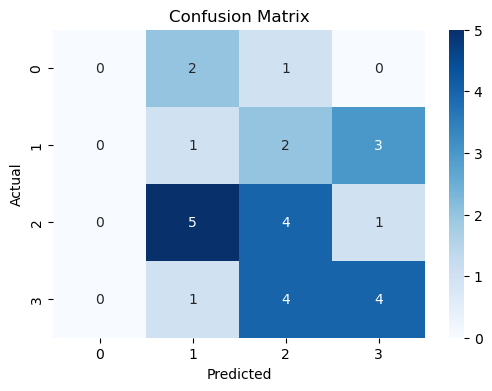

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

predictor_cols = ['Peer pressure', 'Academic pressure from your home', "What would you rate the academic  competition in your student life"]
target_col = 'Rate your academic stress index '

for col in predictor_cols + [target_col]:
    if col not in df.columns:
        raise ValueError(f"Expected column '{col}' not found in the dataset.")

X = df_encoded[predictor_cols]
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()